<a href="https://colab.research.google.com/github/amarviswanathan/AppliedDataScience/blob/master/pytorchnlp/TextClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install transformers

In [7]:
!pip install datasets

     |████████████████████████████████| 312 kB 4.1 MB/s 
     |████████████████████████████████| 134 kB 60.7 MB/s 
     |████████████████████████████████| 212 kB 43.9 MB/s 
     |████████████████████████████████| 1.1 MB 44.4 MB/s 
     |████████████████████████████████| 127 kB 52.7 MB/s 
     |████████████████████████████████| 271 kB 57.5 MB/s 
     |████████████████████████████████| 144 kB 57.6 MB/s 
     |████████████████████████████████| 94 kB 2.7 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [8]:
from datasets import list_datasets

In [10]:
datasets = list_datasets()
print(f"There are {len(datasets)} on the hub")
print(f"The first 10 are : {datasets[:10]}")

There are 3507 on the hub
The first 10 are : ['acronym_identification', 'ade_corpus_v2', 'adversarial_qa', 'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'ai2_arc', 'air_dialogue', 'ajgt_twitter_ar', 'allegro_reviews']


In [11]:
print(datasets.index('aeslc'))

3


In [12]:
# Inspect metadata associated with the datasets


metadata = list_datasets(with_details=True)[datasets.index('emotion')]
dir(metadata)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'author',
 'cardData',
 'citation',
 'description',
 'downloads',
 'gated',
 'id',
 'lastModified',
 'likes',
 'paperswithcode_id',
 'private',
 'sha',
 'siblings',
 'tags']

In [14]:
print("Description is : {metadata.description}")
print("Citation is : ".join(metadata.citation.split("\n")))

Description is : {metadata.description}
@inproceedings{saravia-etal-2018-carer,Citation is :     title = "{CARER}: Contextualized Affect Representations for Emotion Recognition",Citation is :     author = "Saravia, Elvis  andCitation is :       Liu, Hsien-Chi Toby  andCitation is :       Huang, Yen-Hao  andCitation is :       Wu, Junlin  andCitation is :       Chen, Yi-Shin",Citation is :     booktitle = "Proceedings of the 2018 Conference on Empirical Methods in Natural Language Processing",Citation is :     month = oct # "-" # nov,Citation is :     year = "2018",Citation is :     address = "Brussels, Belgium",Citation is :     publisher = "Association for Computational Linguistics",Citation is :     url = "https://www.aclweb.org/anthology/D18-1404",Citation is :     doi = "10.18653/v1/D18-1404",Citation is :     pages = "3687--3697",Citation is :     abstract = "Emotions are expressed in nuanced ways, which varies by collective or individual experiences, knowledge, and beliefs. There

In [17]:

# Load the dataset
from datasets import load_dataset

emotions = load_dataset('emotion')

Downloading:   0%|          | 0.00/1.66k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.61k [00:00<?, ?B/s]

Using custom data configuration default


Downloading:   0%|          | 0.00/1.66M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/204k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/207k [00:00<?, ?B/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [18]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [19]:
# Let us create pandas dataframes out of this

train_ds = emotions['train']
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [20]:
len(train_ds)

16000

In [21]:
train_ds[0]

{'label': 0, 'text': 'i didnt feel humiliated'}

In [22]:
# Accessing all the features of Dataset

train_ds.features

{'label': ClassLabel(num_classes=6, names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None),
 'text': Value(dtype='string', id=None)}

In [23]:
# Access first five rows
train_ds[:5]

{'label': [0, 0, 3, 2, 3],
 'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy']}

In [25]:
 # Get a full column

 train_ds['text'][:5]

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'i am feeling grouchy']

In [28]:
import pandas as pd 
emotions.set_format(type='pandas')

df = emotions['train'][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [29]:
type(emotions['train'])

datasets.arrow_dataset.Dataset

In [30]:
type(emotions['train'][:])

pandas.core.frame.DataFrame

In [31]:
# int2str

def label_int2str(row,split):
  return emotions[split].features['label'].int2str(row)

df['label_name'] = df['label'].apply(label_int2str,split="train")
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


Text(0.5, 1.0, 'Category Counts')

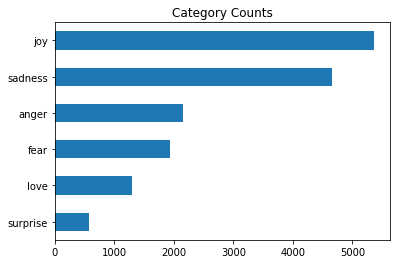

In [32]:
import matplotlib.pyplot as plt 

df['label_name'].value_counts(ascending=True).plot.barh()
plt.title("Category Counts")

In [33]:
# How long are our tweets
# BERT max context size is 512 tokens 
# Token is defined by the choice of the tokenizer and can be word, subword or character

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 0, '')

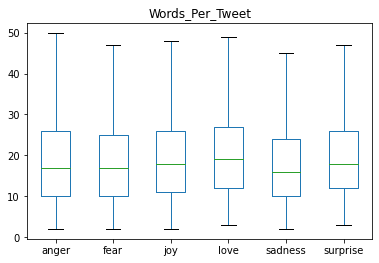

In [36]:
df['Words_Per_Tweet'] = df['text'].str.split().apply(len)

df.boxplot("Words_Per_Tweet",by='label_name', grid=False, showfliers=False)
plt.suptitle("")
plt.xlabel("")

In [40]:
# Character Tokenization

text = 'Tokenizing text is a core task of NLP'

tokenized_text = list(text)
print(tokenized_text)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P']


In [42]:
# Numericalization
token2idx = {}
for idx,unique_char in enumerate(set(tokenized_text)):

  token2idx[unique_char] = idx

print(token2idx)

{'P': 0, 'n': 1, 'e': 2, 's': 3, 'f': 4, 'a': 5, 'c': 6, 't': 7, 'L': 8, 'x': 9, 'i': 10, ' ': 11, 'k': 12, 'r': 13, 'T': 14, 'g': 15, 'N': 16, 'o': 17, 'z': 18}


In [43]:
input_ids = [token2idx[token] for token in tokenized_text]
print(input_ids)

[14, 17, 12, 2, 1, 10, 18, 10, 1, 15, 11, 7, 2, 9, 7, 11, 10, 3, 11, 5, 11, 6, 17, 13, 2, 11, 7, 5, 3, 12, 11, 17, 4, 11, 16, 8, 0]


In [47]:
# Converting to one hot representations

import torch

input_ids = torch.tensor(input_ids)
type(input_ids)
# input_ids.shape
one_hot_encodings = torch.nn.functional.one_hot(input_ids)
one_hot_encodings.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


torch.Size([37, 19])

In [48]:
print(f"Token : {tokenized_text[0]}")
print(f"Tensor index : {input_ids[0]}")
print(f"One-hot vector : {one_hot_encodings[0]}")

Token : T
Tensor index : 14
One-hot vector : tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])
